In [1]:
#!pip install bs4
#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge folium=0.5.0 --yes 
#!pip install geocoder

In [2]:
import requests
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from sklearn.cluster import KMeans
from urllib.request import urlopen

In [3]:
#Creating neighborhood dataframe

In [4]:
d = { 'Borough': ['União das Freguesias de Aldoar, Foz do Douro e Nevogilde', 'União das Freguesias de Aldoar, Foz do Douro e Nevogilde', 'União das Freguesias de Aldoar, Foz do Douro e Nevogilde', 'Bonfim', 'Campanhã', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'União das Freguesias de Lordelo do Ouro e Massarelos', 'União das Freguesias de Lordelo do Ouro e Massarelos', 'Paranhos', 'Ramalde'], 
     'Neighborhood': ['Aldoar', 'Foz do Douro', 'Nevogilde', 'Bonfim','Campanhã','Cedofeita', 'Santo Ildefonso', 'Sé', 'Miragaia', 'São Nicolau', 'Vitória', 'Lordelo do Ouro', 'Massarelos', 'Paranhos', 'Ramalde' ], 
     'Latitude': [41.171944, 41.1518, 41.1686, 41.1510, 41.1614, 41.1556, 41.153, 41.1433, 41.146, 41.1416, 41.1472, 41.1562, 41.150223, 41.1754, 41.1664],
     'Longitude':[-8.671389, -8.6746, -8.6870, -8.5941, -8.5764, -8.6144, -8.608, -8.6091, -8.62, -8.6156, -8.6151, -8.6517, -8.629932, -8.6075, -8.6499]}
df = pd.DataFrame(data=d)
df

,Borough,Neighborhood,Latitude,Longitude
0,"União das Freguesias de Aldoar, Foz do Douro e...",Aldoar,41.171944,-8.671389
1,"União das Freguesias de Aldoar, Foz do Douro e...",Foz do Douro,41.151800,-8.674600
2,"União das Freguesias de Aldoar, Foz do Douro e...",Nevogilde,41.168600,-8.687000
3,Bonfim,Bonfim,41.151000,-8.594100
4,Campanhã,Campanhã,41.161400,-8.576400
5,"União das Freguesias de Cedofeita, Santo Ildef...",Cedofeita,41.155600,-8.614400
6,"União das Freguesias de Cedofeita, Santo Ildef...",Santo Ildefonso,41.153000,-8.608000
7,"União das Freguesias de Cedofeita, Santo Ildef...",Sé,41.143300,-8.609100
8,"União das Freguesias de Cedofeita, Santo Ildef...",Miragaia,41.146000,-8.620000
9,"União das Freguesias de Cedofeita, Santo Ildef...",São Nicolau,41.141600,-8.615600


In [5]:
# The code was removed by Watson Studio for sharing.

In [6]:
# create map of Porto using latitude and longitude values
map_porto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_porto)  
    
map_porto

In [7]:
df.loc[0, 'Neighborhood']

'Aldoar'

In [8]:
latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(name, 
                                                               latitude, 
                                                               longitude))

Latitude and longitude values of Aldoar are 41.171944, -8.671389.


In [9]:
# create the API request URL
categoryId = "4d4b7105d754a06374d81259"
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    categoryId,
    lat, 
    lng, 
    radius, 
    LIMIT)

In [10]:
# make the GET request
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6101bd1c6d819916877b8a67'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Porto',
  'headerFullLocation': 'Porto',
  'headerLocationGranularity': 'city',
  'query': 'food',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 41.175400009000015,
    'lng': -8.637966960199273},
   'sw': {'lat': 41.15739999099999, 'lng': -8.661833039800728}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5475a62f498ea3fb98db0e85',
       'name': 'Sushihana Sushi Bar',
       'location': {'address': 'Rua Prof Mota Pinto 138',
        'lat': 41.16669123517119,
        'lng': -8.65167380889653,
        'labeledLatLngs': [{'label': 'display',
          'lat':

In [11]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Sushihana Sushi Bar,Sushi Restaurant,41.166691,-8.651674
1,Pita Gourmet,Greek Restaurant,41.166948,-8.651846
2,Medit/Degrau,Restaurant,41.163477,-8.647344
3,Sushi-naka,Japanese Restaurant,41.167013,-8.652085
4,Pastelaria Lusitana,Bakery,41.167099,-8.649751


In [13]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            categoryId,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
porto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Aldoar
Foz do Douro
Nevogilde
Bonfim
Campanhã
Cedofeita
Santo Ildefonso
Sé
Miragaia
São Nicolau
Vitória
Lordelo do Ouro
Massarelos
Paranhos
Ramalde


In [16]:
print(porto_venues.shape)
porto_venues.head()

(1007, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aldoar,41.171944,-8.671389,Soundwich,41.170314,-8.671642,Sandwich Place
1,Aldoar,41.171944,-8.671389,Café do Parque da Cidade,41.170143,-8.672567,Café
2,Aldoar,41.171944,-8.671389,Meet Parque,41.170065,-8.672510,Café
3,Aldoar,41.171944,-8.671389,Pizza Uau,41.163585,-8.667281,Pizza Place
4,Aldoar,41.171944,-8.671389,Bô 457,41.179590,-8.673779,Portuguese Restaurant


In [17]:
# one hot encoding
porto_onehot = pd.get_dummies(porto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
porto_onehot['Neighborhood'] = porto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [porto_onehot.columns[-1]] + list(porto_onehot.columns[:-1])
toronto_onehot = porto_onehot[fixed_columns]

porto_onehot.head()

,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,...,Spanish Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aldoar
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aldoar
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aldoar
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aldoar
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Aldoar


In [18]:
porto_onehot.shape

(1007, 54)

In [19]:
porto_grouped = porto_onehot.groupby('Neighborhood').mean().reset_index()
porto_grouped

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Brazilian Restaurant,...,Soup Place,Spanish Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant
0,Aldoar,0.00,0.00,0.00,0.00,0.071429,0.000000,0.071429,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.071429,0.00,0.000000
1,Bonfim,0.00,0.00,0.00,0.00,0.000000,0.043478,0.097826,0.00000,0.010870,...,0.000000,0.01087,0.000000,0.010870,0.00,0.032609,0.00,0.000000,0.00,0.032609
2,Campanhã,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.052632,...,0.000000,0.00000,0.052632,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
3,Cedofeita,0.00,0.00,0.01,0.00,0.010000,0.000000,0.070000,0.00000,0.000000,...,0.000000,0.01000,0.030000,0.030000,0.01,0.020000,0.00,0.000000,0.00,0.020000
4,Foz do Douro,0.00,0.00,0.00,0.00,0.000000,0.000000,0.148936,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.021277,0.00,0.085106,0.00,0.000000,0.00,0.000000
5,Lordelo do Ouro,0.00,0.00,0.00,0.00,0.000000,0.000000,0.142857,0.02381,0.000000,...,0.000000,0.00000,0.000000,0.023810,0.00,0.000000,0.00,0.000000,0.00,0.023810
6,Massarelos,0.00,0.01,0.00,0.00,0.000000,0.010000,0.040000,0.00000,0.010000,...,0.000000,0.00000,0.000000,0.050000,0.00,0.020000,0.00,0.000000,0.00,0.020000
7,Miragaia,0.01,0.00,0.00,0.02,0.010000,0.000000,0.030000,0.02000,0.000000,...,0.000000,0.00000,0.020000,0.030000,0.01,0.110000,0.01,0.000000,0.00,0.020000
8,Nevogilde,0.00,0.00,0.00,0.00,0.035714,0.000000,0.035714,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.107143,0.00,0.035714,0.00,0.035714,0.00,0.000000
9,Paranhos,0.00,0.00,0.00,0.00,0.000000,0.085714,0.057143,0.00000,0.028571,...,0.028571,0.00000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.028571


In [20]:
num_top_venues = 5

for hood in porto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = porto_grouped[porto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aldoar----
                   venue  freq
0                   Café  0.36
1            Pizza Place  0.07
2         Sandwich Place  0.07
3                  Diner  0.07
4  Portuguese Restaurant  0.07


----Bonfim----
                   venue  freq
0                   Café  0.21
1             Restaurant  0.18
2  Portuguese Restaurant  0.17
3                 Bakery  0.10
4              BBQ Joint  0.04


----Campanhã----
                  venue  freq
0        Sandwich Place  0.16
1                  Café  0.16
2  Fast Food Restaurant  0.11
3            Restaurant  0.11
4           Snack Place  0.05


----Cedofeita----
                        venue  freq
0       Portuguese Restaurant  0.23
1                        Café  0.11
2                  Restaurant  0.08
3                      Bakery  0.07
4  Modern European Restaurant  0.05


----Foz do Douro----
                   venue  freq
0  Portuguese Restaurant  0.19
1             Restaurant  0.17
2                 Bakery  0.15
3             

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues] 

In [22]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = porto_grouped['Neighborhood']

for ind in np.arange(porto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(porto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(15
                            )

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldoar,Café,Burger Joint,Bakery,Portuguese Restaurant,Sandwich Place,Seafood Restaurant,Diner,Pizza Place,Asian Restaurant,Thai Restaurant
1,Bonfim,Café,Restaurant,Portuguese Restaurant,Bakery,BBQ Joint,Vegetarian / Vegan Restaurant,Tapas Restaurant,Burger Joint,Indian Restaurant,Sandwich Place
2,Campanhã,Café,Sandwich Place,Fast Food Restaurant,Restaurant,Food Court,Brazilian Restaurant,Pizza Place,Burger Joint,Salad Place,Snack Place
3,Cedofeita,Portuguese Restaurant,Café,Restaurant,Bakery,Modern European Restaurant,Burger Joint,Italian Restaurant,Diner,Breakfast Spot,Sushi Restaurant
4,Foz do Douro,Portuguese Restaurant,Restaurant,Bakery,Café,Tapas Restaurant,Italian Restaurant,Pizza Place,Japanese Restaurant,Seafood Restaurant,Fondue Restaurant
5,Lordelo do Ouro,Portuguese Restaurant,Bakery,Restaurant,Café,Fast Food Restaurant,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Diner,Italian Restaurant
6,Massarelos,Café,Portuguese Restaurant,Restaurant,Italian Restaurant,Burger Joint,Sushi Restaurant,Snack Place,Pizza Place,Bakery,Mediterranean Restaurant
7,Miragaia,Portuguese Restaurant,Tapas Restaurant,Restaurant,Café,Mediterranean Restaurant,Italian Restaurant,Bakery,Sushi Restaurant,Breakfast Spot,Burger Joint
8,Nevogilde,Café,Restaurant,Portuguese Restaurant,Sushi Restaurant,Seafood Restaurant,Burger Joint,Pizza Place,Italian Restaurant,Creperie,Bakery
9,Paranhos,Café,Restaurant,Italian Restaurant,BBQ Joint,Portuguese Restaurant,Bakery,Vegetarian / Vegan Restaurant,Sandwich Place,Fast Food Restaurant,Comfort Food Restaurant


In [32]:
# set number of clusters
kclusters = 3

porto_grouped_clustering = porto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(porto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 2, 1, 0, 0, 0, 1, 0, 2], dtype=int32)

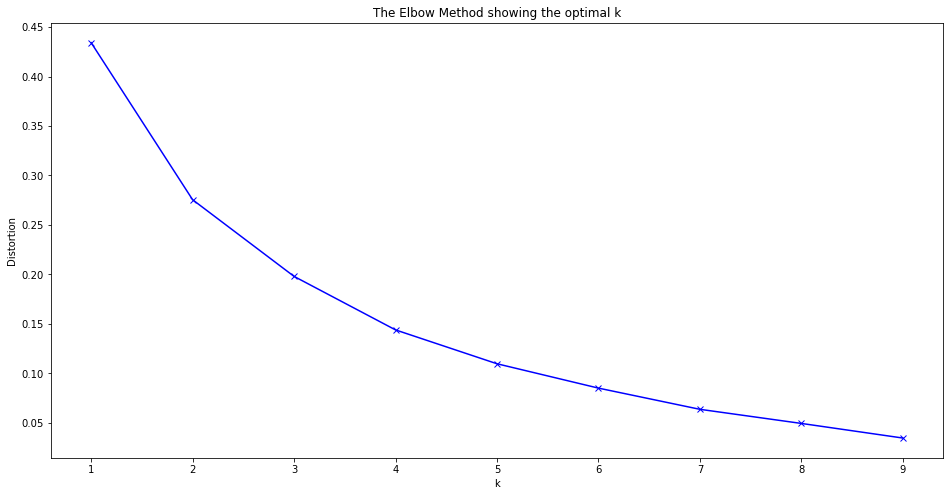

In [33]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    kmeanModel.fit(porto_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [34]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

porto_merged = df

# merge porto_grouped with porto_data to add latitude/longitude for each neighborhood
porto_merged = porto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how ='inner')

porto_merged.head() 

ValueError: cannot insert Cluster Labels, already exists

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(porto_merged['Latitude'], porto_merged['Longitude'], porto_merged['Neighborhood'], porto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [36]:
porto_merged.loc[porto_merged['Cluster Labels'] == 0, porto_merged.columns[[1] + list(range(5, porto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Cedofeita,Portuguese Restaurant,Café,Restaurant,Bakery,Modern European Restaurant,Burger Joint,Italian Restaurant,Diner,Breakfast Spot,Sushi Restaurant
6,Santo Ildefonso,Portuguese Restaurant,Café,Restaurant,Sandwich Place,Bakery,Modern European Restaurant,Pizza Place,Italian Restaurant,Tapas Restaurant,Sushi Restaurant
7,Sé,Portuguese Restaurant,Café,Tapas Restaurant,Restaurant,Bakery,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Sandwich Place,Pizza Place
8,Miragaia,Portuguese Restaurant,Tapas Restaurant,Restaurant,Café,Mediterranean Restaurant,Italian Restaurant,Bakery,Sushi Restaurant,Breakfast Spot,Burger Joint
9,São Nicolau,Portuguese Restaurant,Tapas Restaurant,Restaurant,Café,Mediterranean Restaurant,Italian Restaurant,Japanese Restaurant,Sandwich Place,Bakery,Steakhouse
10,Vitória,Portuguese Restaurant,Tapas Restaurant,Café,Restaurant,Japanese Restaurant,Mediterranean Restaurant,Bakery,Italian Restaurant,Modern European Restaurant,Pizza Place


In [42]:
porto_merged.loc[porto_merged['Cluster Labels'] == 1, porto_merged.columns[[1] + list(range(1, porto_merged.shape[1]))]]

,Neighborhood,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Foz do Douro,Foz do Douro,41.151800,-8.674600,1,Portuguese Restaurant,Restaurant,Bakery,Café,Tapas Restaurant,Italian Restaurant,Pizza Place,Japanese Restaurant,Seafood Restaurant,Fondue Restaurant
2,Nevogilde,Nevogilde,41.168600,-8.687000,1,Café,Restaurant,Portuguese Restaurant,Sushi Restaurant,Seafood Restaurant,Burger Joint,Pizza Place,Italian Restaurant,Creperie,Bakery
3,Bonfim,Bonfim,41.151000,-8.594100,1,Café,Restaurant,Portuguese Restaurant,Bakery,BBQ Joint,Vegetarian / Vegan Restaurant,Tapas Restaurant,Burger Joint,Indian Restaurant,Sandwich Place
11,Lordelo do Ouro,Lordelo do Ouro,41.156200,-8.651700,1,Portuguese Restaurant,Bakery,Restaurant,Café,Fast Food Restaurant,Japanese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Diner,Italian Restaurant
12,Massarelos,Massarelos,41.150223,-8.629932,1,Café,Portuguese Restaurant,Restaurant,Italian Restaurant,Burger Joint,Sushi Restaurant,Snack Place,Pizza Place,Bakery,Mediterranean Restaurant
14,Ramalde,Ramalde,41.166400,-8.649900,1,Portuguese Restaurant,Café,Restaurant,Pizza Place,Bakery,Fast Food Restaurant,Japanese Restaurant,Sushi Restaurant,Burger Joint,Diner


In [38]:
porto_merged.loc[porto_merged['Cluster Labels'] == 2, porto_merged.columns[[1] + list(range(5, porto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aldoar,Café,Burger Joint,Bakery,Portuguese Restaurant,Sandwich Place,Seafood Restaurant,Diner,Pizza Place,Asian Restaurant,Thai Restaurant
13,Paranhos,Café,Restaurant,Italian Restaurant,BBQ Joint,Portuguese Restaurant,Bakery,Vegetarian / Vegan Restaurant,Sandwich Place,Fast Food Restaurant,Comfort Food Restaurant


In [39]:
porto_merged.loc[porto_merged['Cluster Labels'] == 3, porto_merged.columns[[1] + list(range(5, porto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Campanhã,Café,Sandwich Place,Fast Food Restaurant,Restaurant,Food Court,Brazilian Restaurant,Pizza Place,Burger Joint,Salad Place,Snack Place


In [31]:
porto_merged.loc[porto_merged['Cluster Labels'] == 4, porto_merged.columns[[1] + list(range(5,  porto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
